In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import kaggle


In [7]:
test = pd.read_csv(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\Porto Seguro\test.csv')
train = pd.read_csv(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\Porto Seguro\train.csv')

train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [11]:
train.shape
train.info()
train.columns
print(train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [13]:
def build_my_info_table(df):
    numerical_columns = df.select_dtypes(include=[np.number])
    df_info = pd.DataFrame({
        '#':        np.arange(len(df.columns)),
        'column':   [col             for col in df.columns],
        'dtype':    [df[col].dtype   for col in df.columns],
        'count':    [df[col].count() for col in df.columns],

        'mean':     [round(df[col].mean(), 1)         if col in numerical_columns else '' for col in df.columns],
        'std':      [round(df[col].std(), 1)          if col in numerical_columns else '' for col in df.columns],
        'min':      [round(df[col].min(), 1)          if col in numerical_columns else '' for col in df.columns],
        '25%':      [round(df[col].quantile(0.25), 1) if col in numerical_columns else '' for col in df.columns],
        '50%':      [round(df[col].median(), 1)       if col in numerical_columns else '' for col in df.columns],
        '75%':      [round(df[col].quantile(0.75), 1) if col in numerical_columns else '' for col in df.columns],
        'max':      [round(df[col].max(), 1)          if col in numerical_columns else '' for col in df.columns],

        'nunique':  [df[col].nunique()                                          for col in df.columns],
        'unique':   [list(df[col].unique()) if df[col].nunique() < 30 else ''   for col in df.columns],

        'mode':     [df[col].mode()[0]                                          for col in df.columns],
        'mode #':   [df[col].value_counts().max()                               for col in df.columns],
        'mode %':   [round(df[col].value_counts().max() * 100 / df.shape[0], 1) for col in df.columns],

        'null #':   [df[col].isnull().sum()                                     for col in df.columns],
        'null %':   [round(df[col].isnull().mean() * 100, 1)                    for col in df.columns],
    })
    return df_info

In [15]:
info_df = build_my_info_table(train)
info_df

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,mode,mode #,mode %,null #,null %
0,0,id,int64,595212,743803.6,429367.8,7.0,371991.5,743547.5,1115548.8,1488027.0,595212,,7.000000,1,0.0,0,0.0
1,1,target,int64,595212,0.0,0.2,0.0,0.0,0.0,0.0,1.0,2,"[0, 1]",0.000000,573518,96.4,0,0.0
2,2,ps_ind_01,int64,595212,1.9,2.0,0.0,0.0,1.0,3.0,7.0,8,"[2, 1, 5, 0, 4, 3, 6, 7]",0.000000,187594,31.5,0,0.0
3,3,ps_ind_02_cat,int64,595212,1.4,0.7,-1.0,1.0,1.0,2.0,4.0,5,"[2, 1, 4, 3, -1]",1.000000,431859,72.6,0,0.0
4,4,ps_ind_03,int64,595212,4.4,2.7,0.0,2.0,4.0,6.0,11.0,12,"[5, 7, 9, 2, 0, 4, 3, 1, 11, 6, 8, 10]",2.000000,96110,16.1,0,0.0
5,5,ps_ind_04_cat,int64,595212,0.4,0.5,-1.0,0.0,0.0,1.0,1.0,3,"[1, 0, -1]",0.000000,346965,58.3,0,0.0
6,6,ps_ind_05_cat,int64,595212,0.4,1.4,-1.0,0.0,0.0,0.0,6.0,8,"[0, 1, 4, 3, 6, 5, -1, 2]",0.000000,528009,88.7,0,0.0
7,7,ps_ind_06_bin,int64,595212,0.4,0.5,0.0,0.0,0.0,1.0,1.0,2,"[0, 1]",0.000000,360852,60.6,0,0.0
8,8,ps_ind_07_bin,int64,595212,0.3,0.4,0.0,0.0,0.0,1.0,1.0,2,"[1, 0]",0.000000,442223,74.3,0,0.0
9,9,ps_ind_08_bin,int64,595212,0.2,0.4,0.0,0.0,0.0,0.0,1.0,2,"[0, 1]",0.000000,497644,83.6,0,0.0


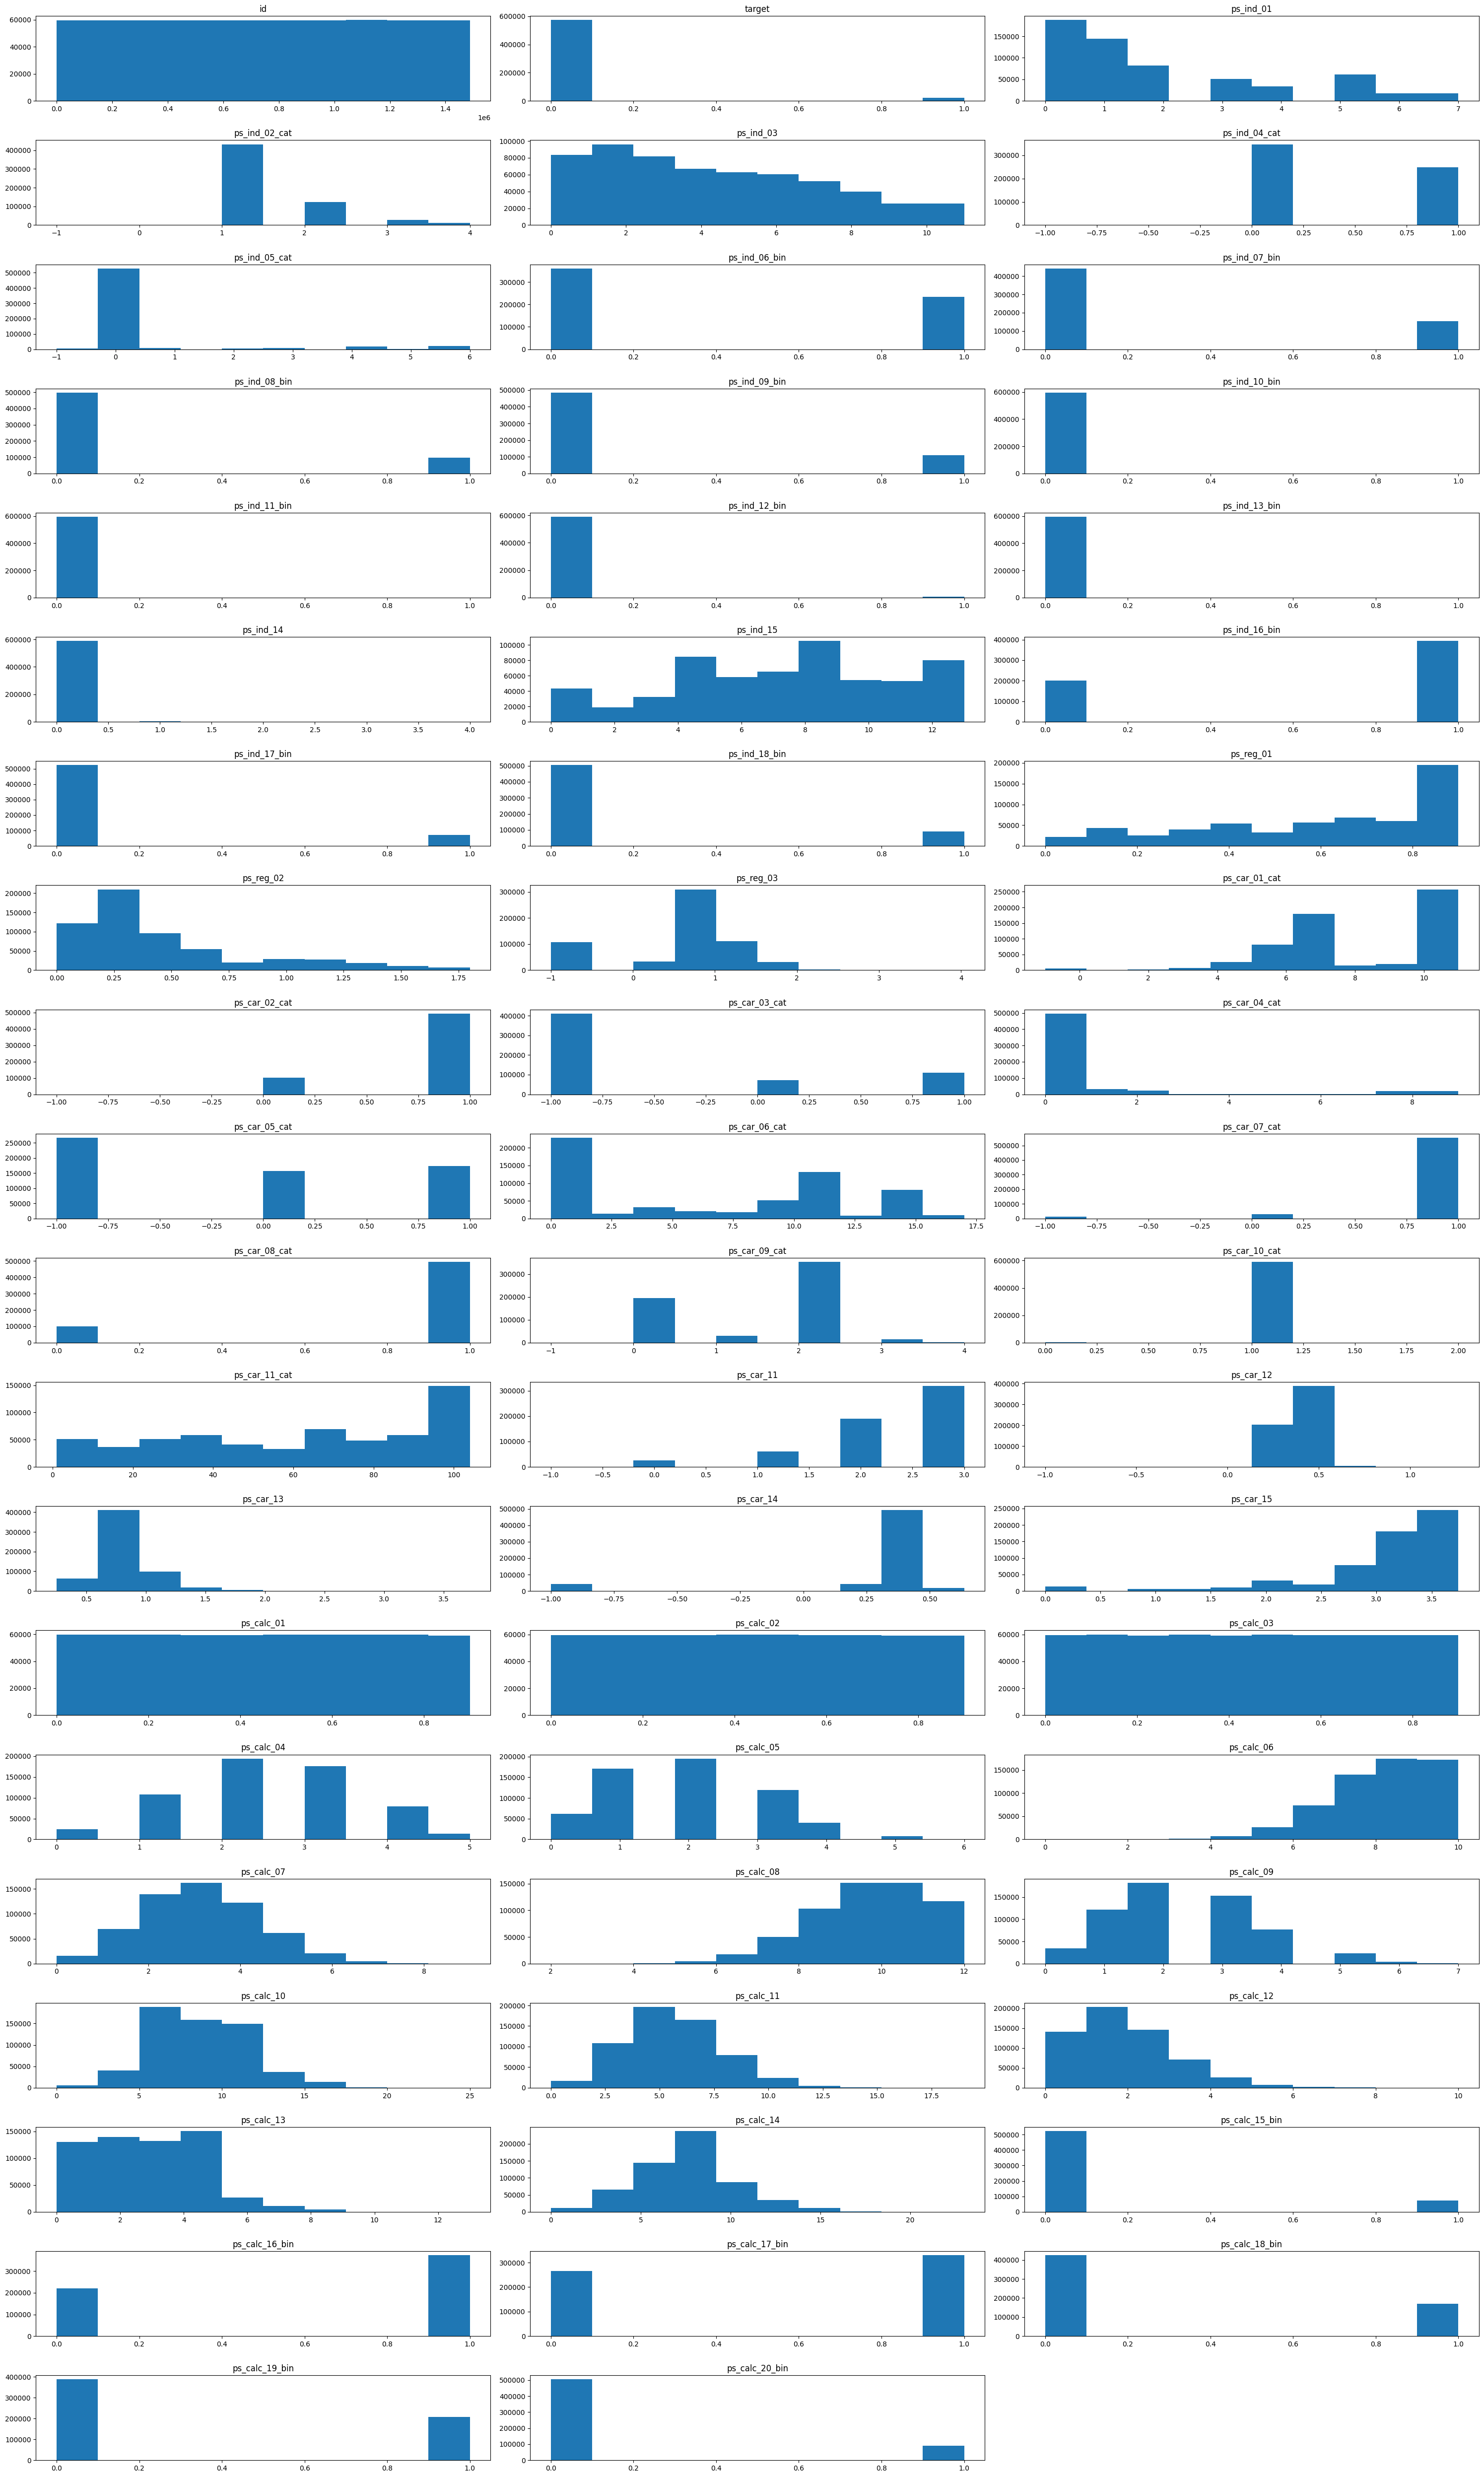

In [27]:
num_cols = len(train.columns)

fig, axes = plt.subplots(20,3, figsize=(30,50))

axes = axes.flatten()
for i, col in enumerate(train.columns):
    axes[i].hist(train[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


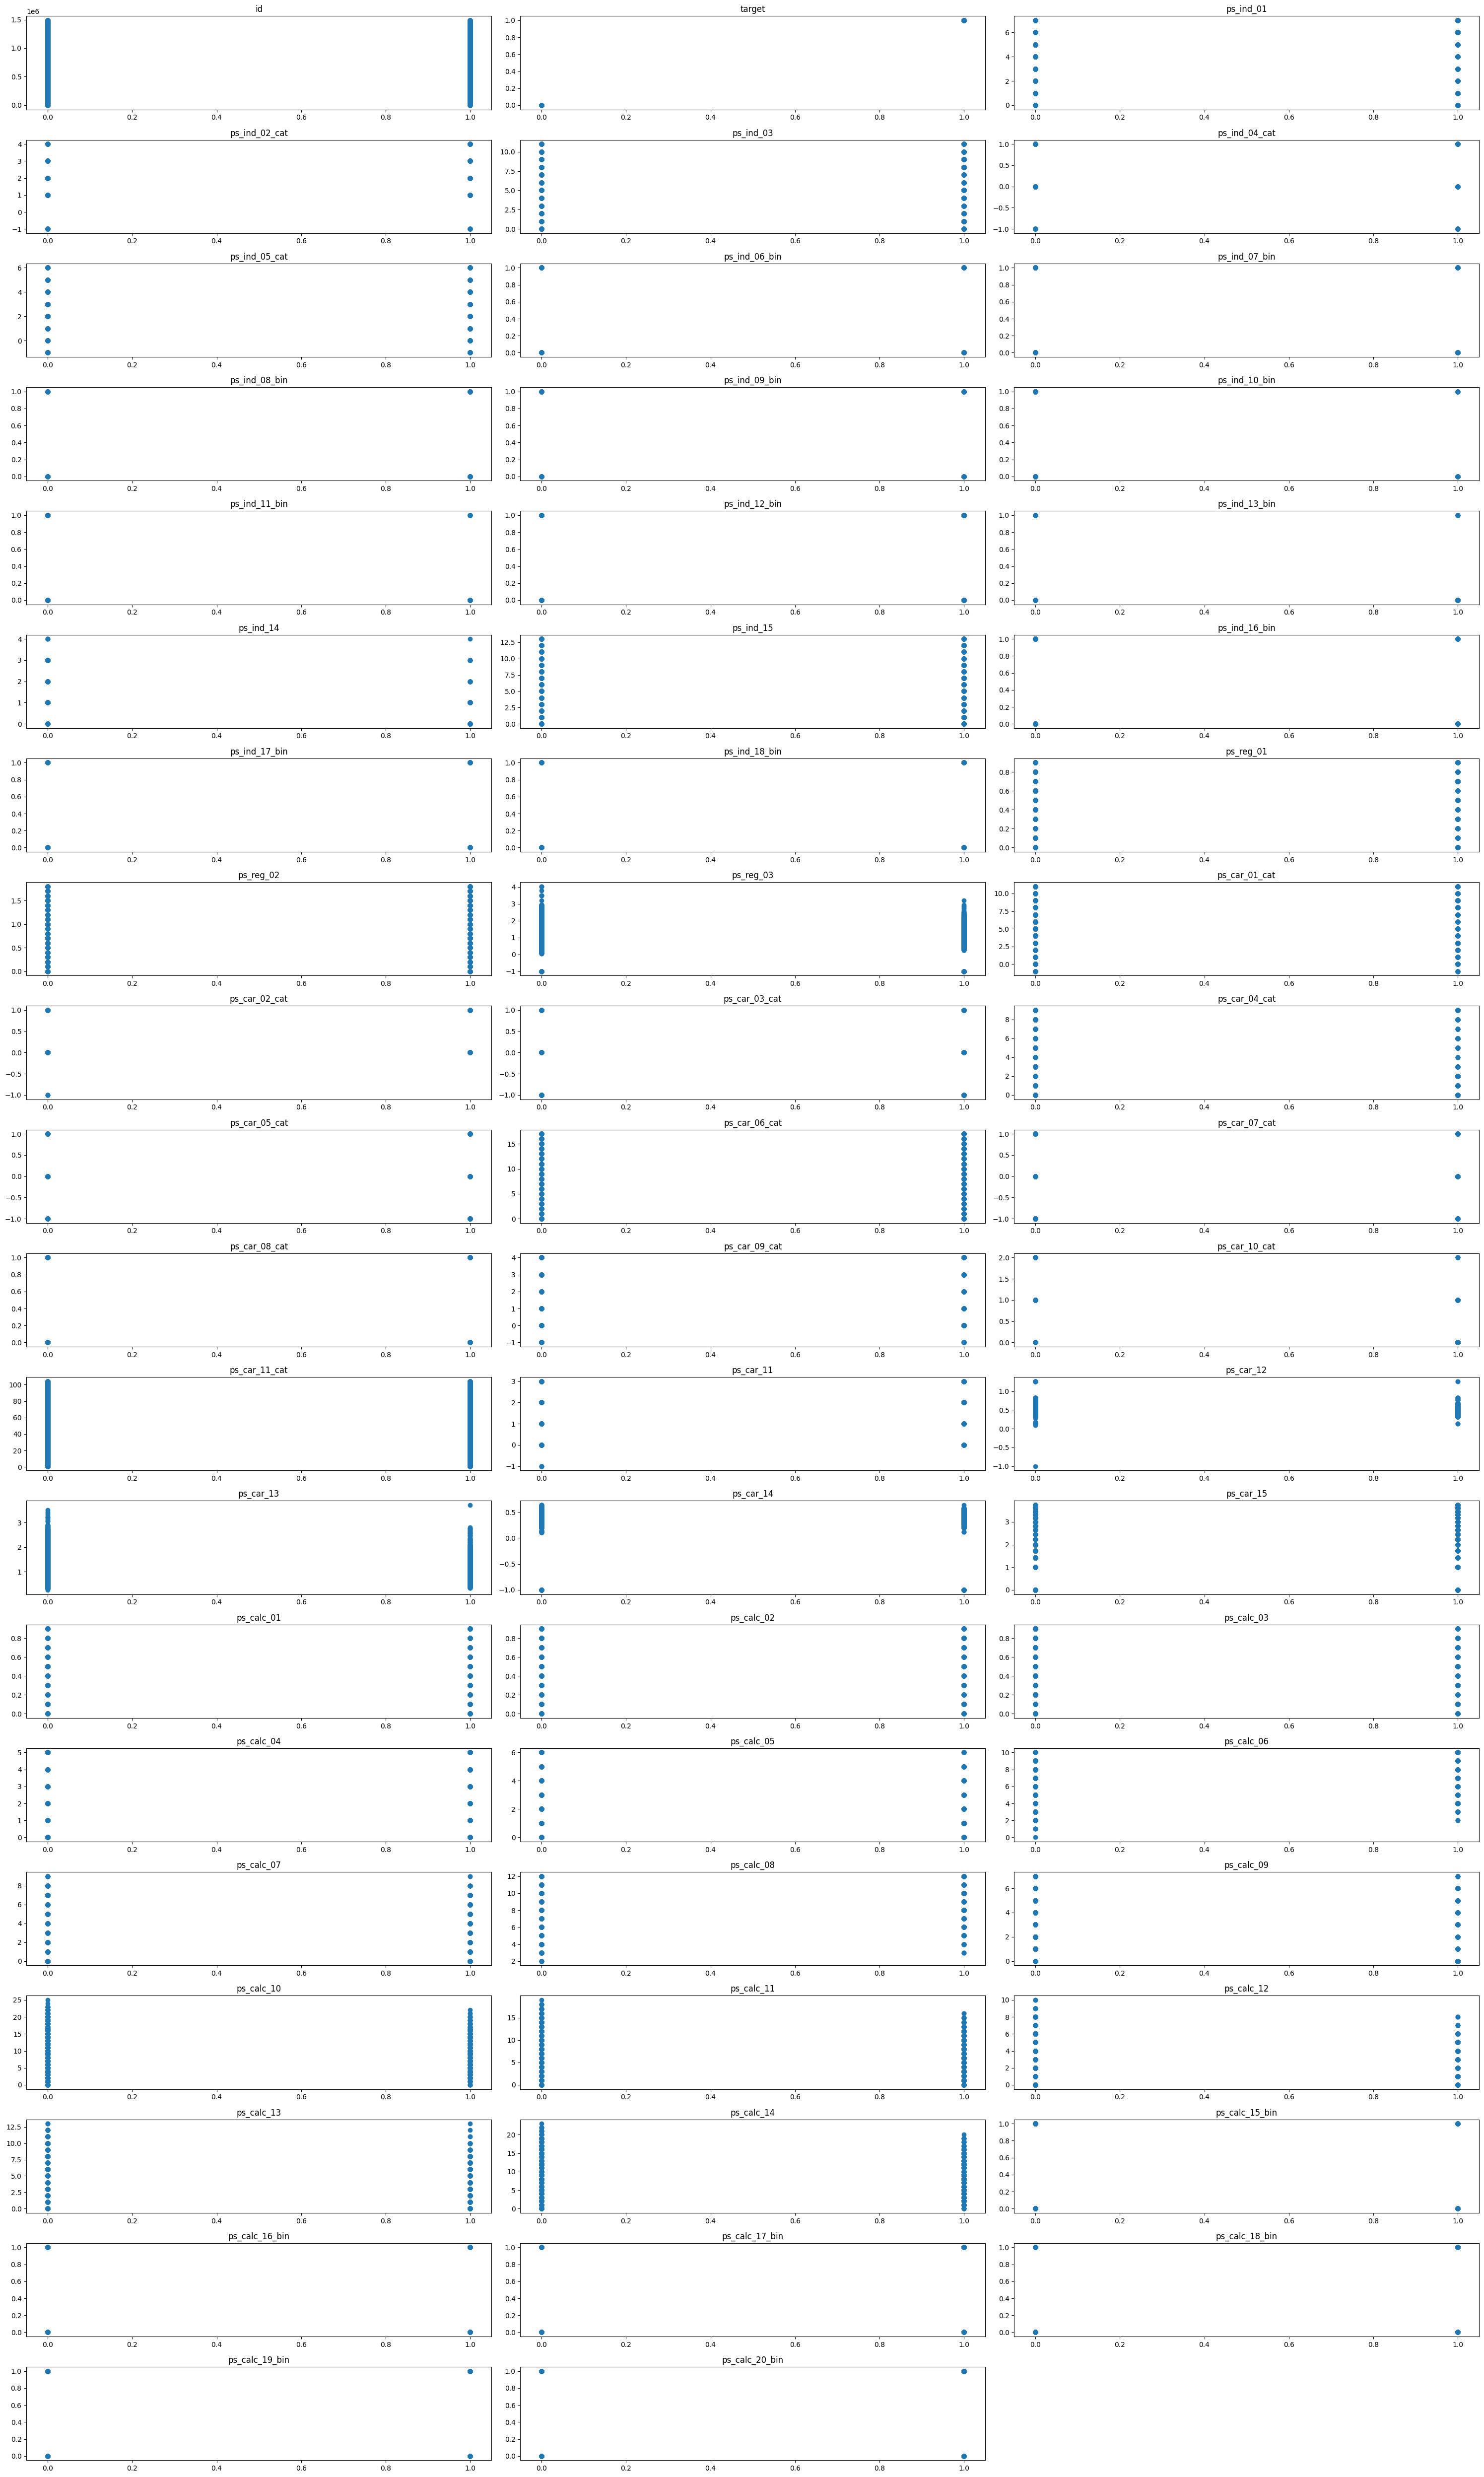

In [29]:
num_cols = len(train.columns)

fig, axes = plt.subplots(20,3, figsize=(30,50))


axes = axes.flatten()


for i, col in enumerate(train.columns):
    axes[i].scatter(train['target'], train[col])
    axes[i].set_title(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10136\229398600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10136\229398600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users

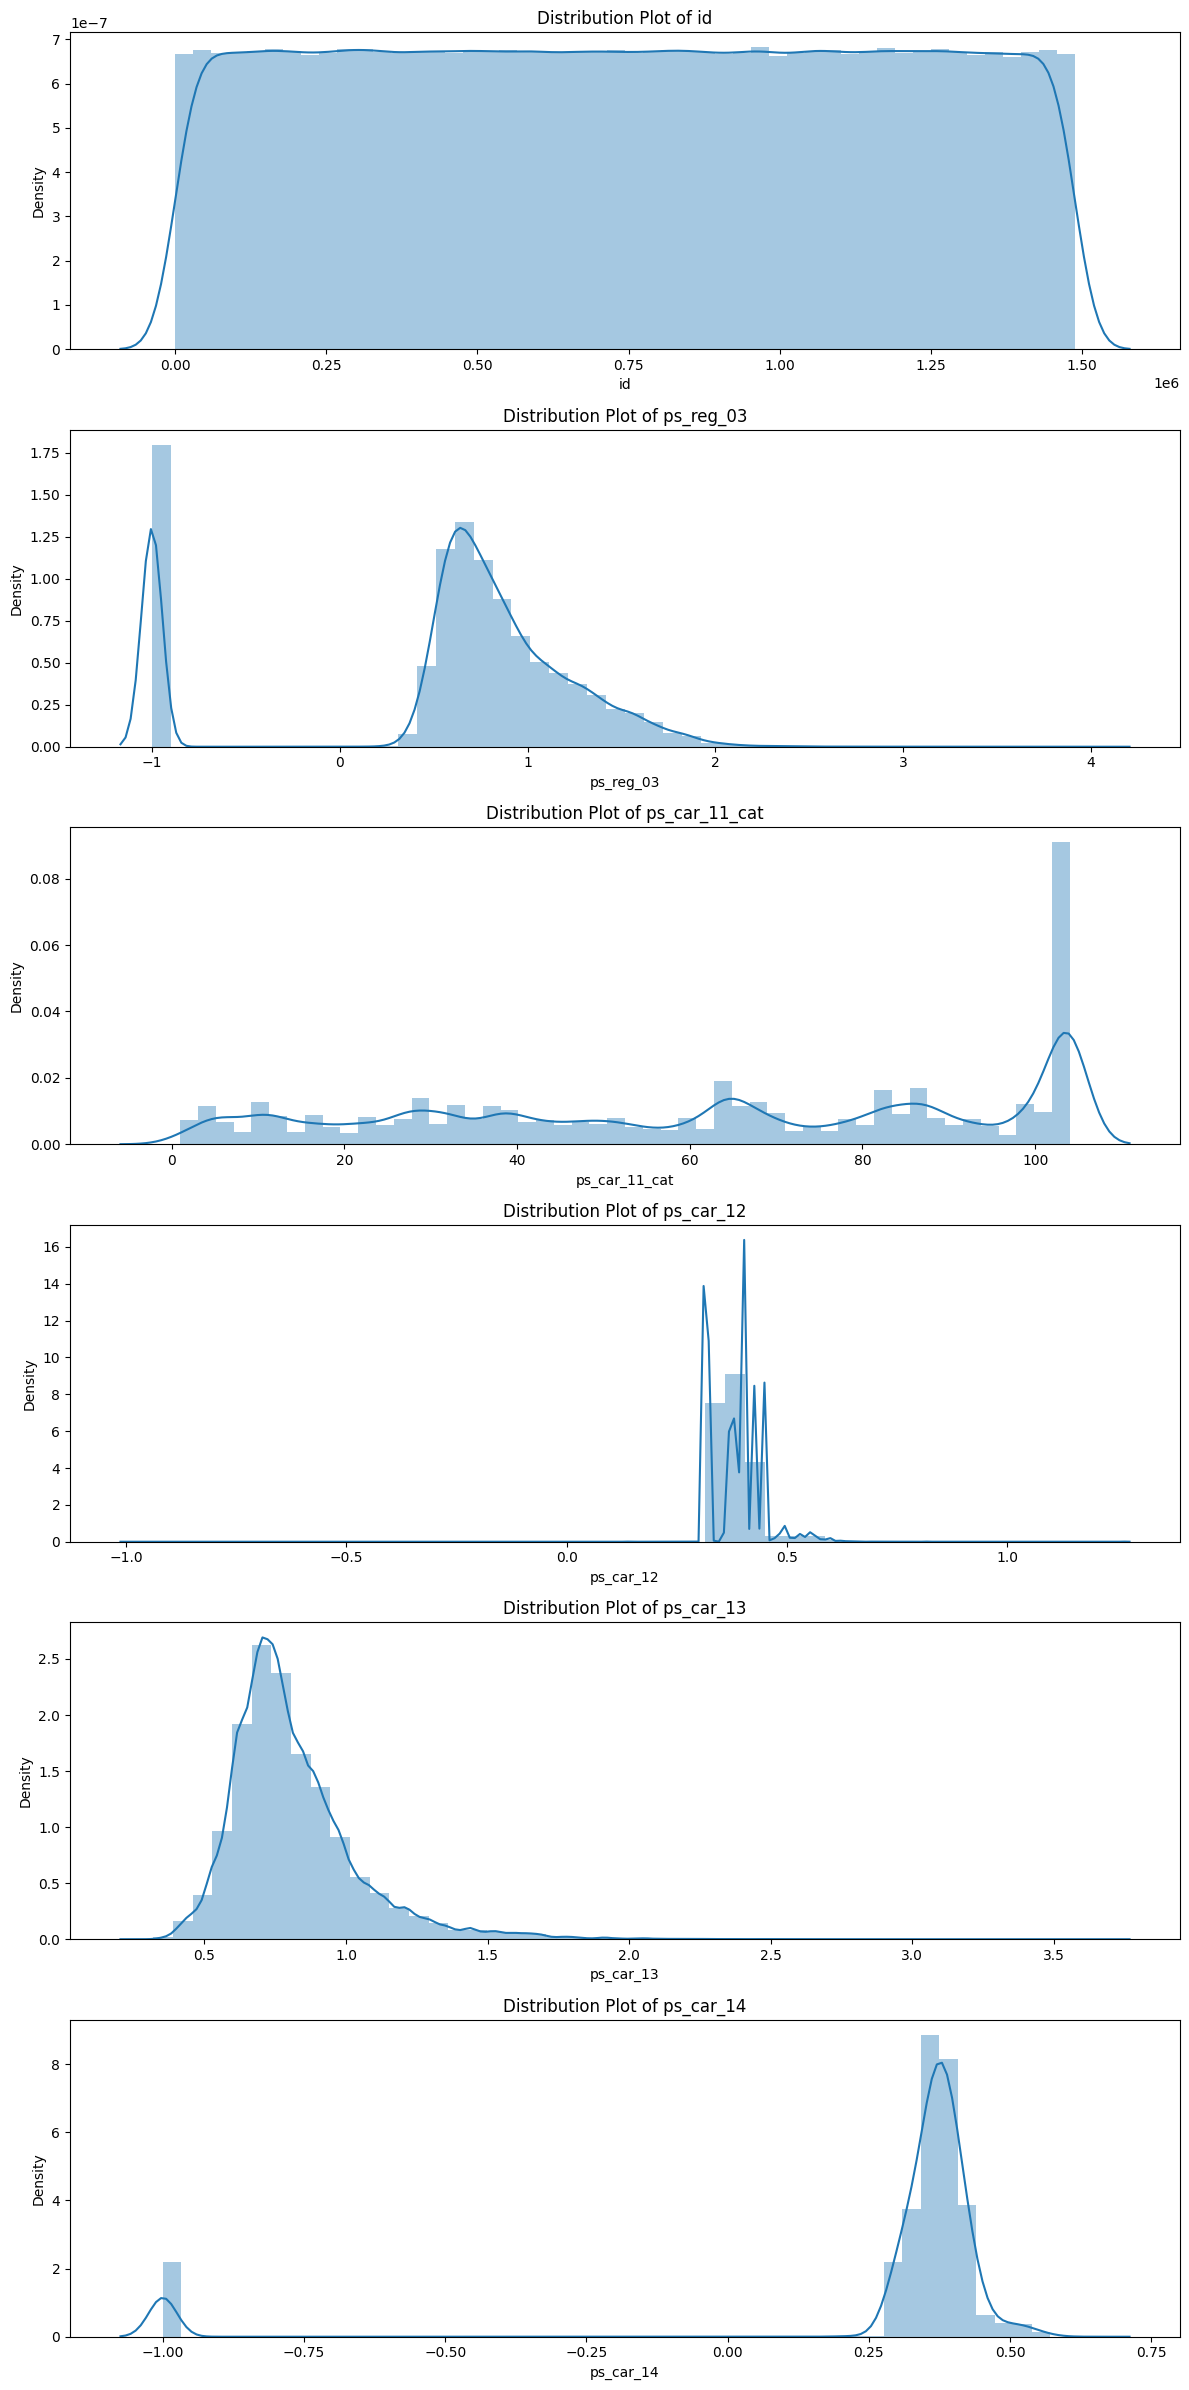

In [33]:
categorical_features = [col for col in train.columns if train[col].nunique() < 30]
numerical_features   = [col for col in train.select_dtypes(include=[np.number]).columns if col not in categorical_features]
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
num_cols = len(train.columns)
def plot_charts_grid_single_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_charts_grid_single_feature(train[numerical_features], my_distplot)    

In [34]:
import statistics

from sklearn.metrics         import mean_squared_error, \
                                    mean_absolute_error, \
                                    mean_squared_log_error, \
                                    r2_score, \
                                    accuracy_score
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler, \
                                    OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.impute          import SimpleImputer

from sklearn.pipeline        import Pipeline


from xgboost                 import XGBClassifier
from lightgbm                import LGBMClassifier
from catboost                import CatBoostClassifier

from sklearn.svm                    import  SVC, \
                                            LinearSVC, \
                                            NuSVC
from sklearn.neighbors              import  KNeighborsClassifier
from sklearn.naive_bayes            import  GaussianNB, \
                                            BernoulliNB
from sklearn.linear_model           import  Perceptron, \
                                            SGDClassifier, \
                                            LogisticRegression, \
                                            LogisticRegressionCV, \
                                            PassiveAggressiveClassifier, \
                                            RidgeClassifierCV, \
                                            SGDClassifier
from sklearn.tree                   import  DecisionTreeClassifier, \
                                            ExtraTreeClassifier
from sklearn.model_selection        import  RepeatedKFold, \
                                            KFold, \
                                            cross_val_score, \
                                            train_test_split, \
                                            GridSearchCV, \
                                            train_test_split, \
                                            RandomizedSearchCV
from sklearn.ensemble               import  RandomForestClassifier, \
                                            AdaBoostClassifier, \
                                            BaggingClassifier, \
                                            GradientBoostingClassifier, \
                                            ExtraTreesClassifier
from sklearn.gaussian_process       import  GaussianProcessClassifier
from sklearn.discriminant_analysis  import  LinearDiscriminantAnalysis, \
                                            QuadraticDiscriminantAnalysis
from xgboost                        import  XGBClassifier

In [35]:
y = train['target']
X = train.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
models = {  
    'ExtraTreeClassifier':            ExtraTreeClassifier(),
    'LinearDiscriminantAnalysis':     LinearDiscriminantAnalysis(),
    'DecisionTreeClassifier':         DecisionTreeClassifier(),
    'SGDClassifier':                  SGDClassifier(),
    'PassiveAggressiveClassifier':    PassiveAggressiveClassifier(),
    'RidgeClassifierCV':              RidgeClassifierCV(),
    'LogisticRegressionCV':           LogisticRegressionCV(),
    'BaggingClassifier':              BaggingClassifier(),
}

In [37]:
def evaluate_model(pipeline, X, y, kf):
    # Perform cross-validation with the given pipeline and metrics
    cv_accuracy = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    cv_precision = cross_val_score(pipeline, X, y, cv=kf, scoring='precision')
    cv_recall = cross_val_score(pipeline, X, y, cv=kf, scoring='recall')
    cv_f1 = cross_val_score(pipeline, X, y, cv=kf, scoring='f1')
    cv_auc = cross_val_score(pipeline, X, y, cv=kf, scoring='roc_auc')
    
    # Calculate the mean of each metric from cross-validation results
    accuracy = statistics.mean(cv_accuracy)
    precision = statistics.mean(cv_precision)
    recall = statistics.mean(cv_recall)
    f1 = statistics.mean(cv_f1)
    auc = statistics.mean(cv_auc)
    
    return accuracy, precision, recall, f1, auc

In [40]:
import time
numerical_features   = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])
results = {}

kf = KFold(n_splits=5, shuffle=True)

for name, model in models.items():

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    print(f'Model {name} begining now ...')
    begin_time = time.time()
    accuracy, precision, recall, f1, auc = evaluate_model(pipeline, X, y, kf)
    end_time = time.time()
    print(f'Model {name} finishing in'.ljust(50), f'{round((end_time - begin_time) / 60, 1)} minutes')

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    }

Model ExtraTreeClassifier begining now ...
Model ExtraTreeClassifier finishing in             1.9 minutes
Model LinearDiscriminantAnalysis begining now ...


c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model LinearDiscriminantAnalysis finishing in      2.6 minutes
Model DecisionTreeClassifier begining now ...
Model DecisionTreeClassifier finishing in          8.0 minutes
Model SGDClassifier begining now ...


c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model SGDClassifier finishing in                   2.0 minutes
Model PassiveAggressiveClassifier begining now ...
Model PassiveAggressiveClassifier finishing in     1.7 minutes
Model RidgeClassifierCV begining now ...


c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model RidgeClassifierCV finishing in               2.6 minutes
Model LogisticRegressionCV begining now ...


c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Model LogisticRegressionCV finishing in            4.7 minutes
Model BaggingClassifier begining now ...
Model BaggingClassifier finishing in               44.9 minutes


In [50]:
results_df = pd.DataFrame(results).T
results_df

,accuracy,precision,recall,f1,auc
ExtraTreeClassifier,0.924042,0.043829,0.054450,0.048942,0.504889
LinearDiscriminantAnalysis,0.963552,0.200000,0.000092,0.000092,0.622798
DecisionTreeClassifier,0.919103,0.047623,0.062328,0.052870,0.506904
SGDClassifier,0.963552,0.000000,0.000141,0.000000,0.514122
PassiveAggressiveClassifier,0.932424,0.050596,0.041089,0.040390,0.506660
RidgeClassifierCV,0.963552,0.000000,0.000000,0.000000,0.622778
LogisticRegressionCV,0.963552,0.000000,0.000000,0.000000,0.622721
BaggingClassifier,0.963386,0.133914,0.000830,0.002200,0.536857


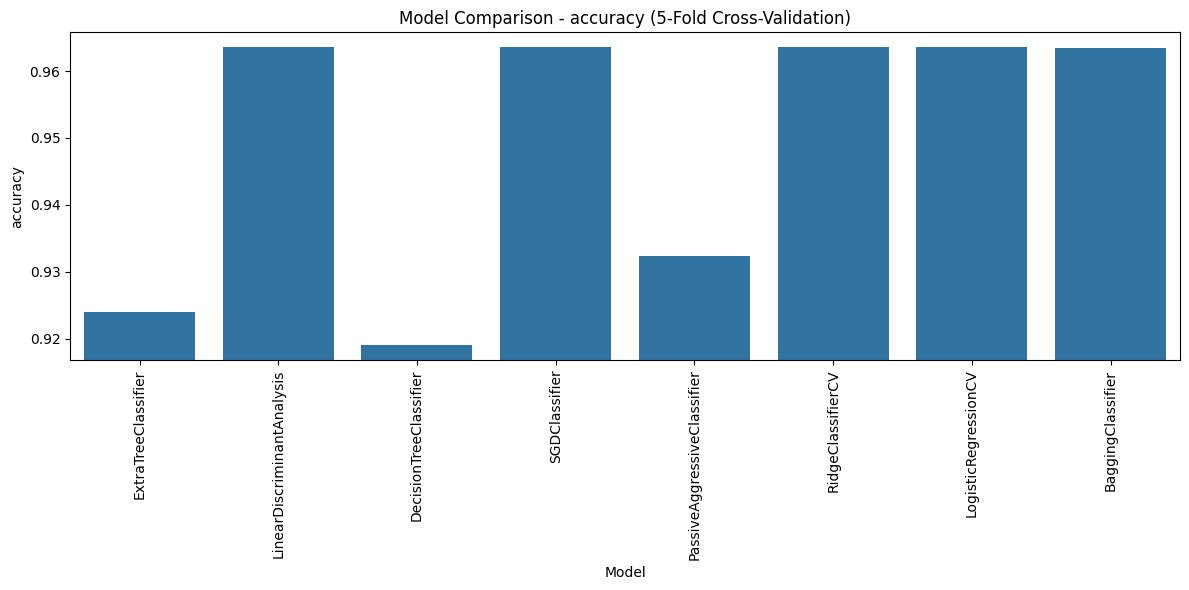

In [52]:
results_df.reset_index(inplace=True)
rmse_df = results_df[['index', 'accuracy']]

plt.figure(figsize=(12, 6))
sns.barplot(data=rmse_df, x='index', y='accuracy')

plt.title("Model Comparison - accuracy (5-Fold Cross-Validation)")
plt.xlabel("Model")
plt.ylabel("accuracy")
yminlim = rmse_df['accuracy'].min()
ymaxlim = rmse_df['accuracy'].max()
yrange = (ymaxlim - yminlim) * .05
yminlim -= yrange
ymaxlim += yrange
plt.ylim(yminlim, ymaxlim)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [54]:
b_model = LinearDiscriminantAnalysis()

b_model = b_model.fit(X_train,y_train)
pred = b_model.predict(X_test)
accuracy_score(y_test, pred)

0.9631645707853465